In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv(r'C:\Users\User\Desktop\Final Project (Endterm)\Python Block\data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


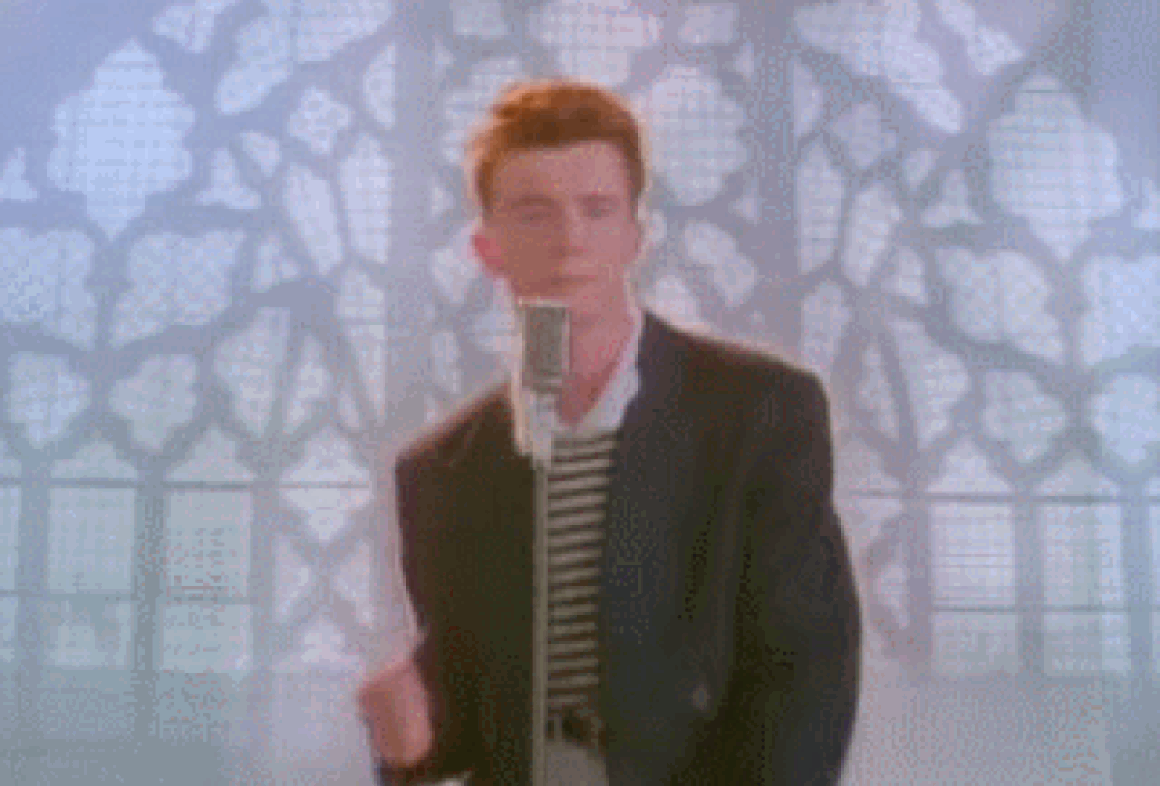

In [5]:
from IPython.display import Image
Image(filename='important_file.gif')

Проверяем формат столбцов

In [3]:
# Check data types of each column to verify format
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [5]:
# Convert "Дата" column to datetime format, handling any parsing errors
df['Дата'] = pd.to_datetime(df['Дата'], dayfirst=True, errors='coerce')

# Drop rows where "Дата" could not be converted
df = df.dropna(subset=['Дата'])

Сгруппируйте данные по дате, посчитайте количество продаж

In [6]:
# Group by date and sum up sales quantities
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()
print(grouped_df.head())

        Дата  Количество
0 2018-01-02        3770
1 2018-01-03        3848
2 2018-01-04        3786
3 2018-01-05        4221
4 2018-01-06        4736


Вывести несколько первых строк сгруппированных данных

In [18]:
# Display the first few rows of the grouped data
print(grouped_df.head())

        Дата  Количество       Date
0 2018-01-02        3770 2018-01-02
1 2018-01-03        3848 2018-01-03
2 2018-01-04        3786 2018-01-04
3 2018-01-05        4221 2018-01-05
4 2018-01-06        4736 2018-01-06


Нарисуйте график продаж у `grouped_df`

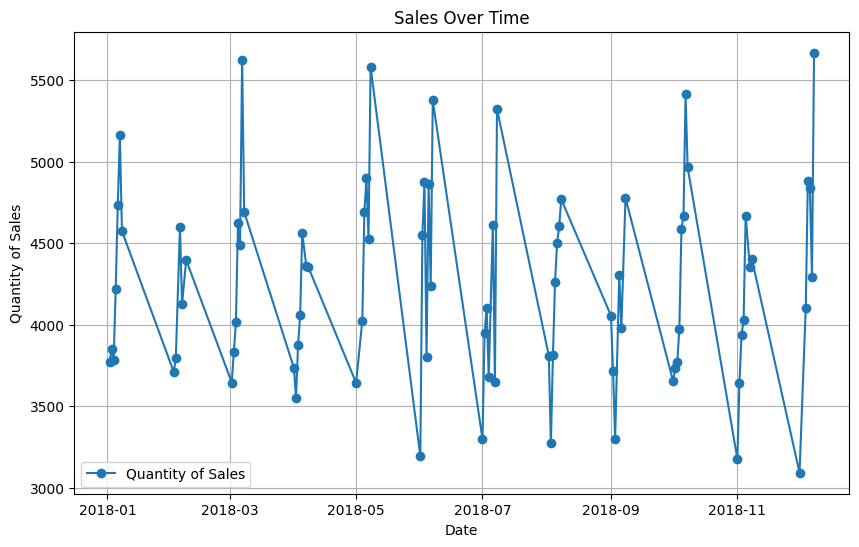

In [ ]:
# Plot sales data from grouped_df
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o', label='Quantity of Sales')
plt.xlabel('Date')
plt.ylabel('Quantity of Sales')
plt.title('Sales Over Time')
plt.legend()
plt.grid(True)
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [8]:
# Find the row with the maximum sales quantity
outlier_row = df[df['Количество'] == df['Количество'].max()]
print(outlier_row)

             Дата  Склад   Контрагент Номенклатура  Количество
234607 2018-11-07      1  address_208   product_13          60


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [9]:
# Filter for Wednesdays in June, July, and August at warehouse 3
summer_data = df[(df['Дата'].dt.month.isin([6, 7, 8])) & 
                 (df['Дата'].dt.dayofweek == 2) & 
                 (df['Склад'] == 3)]
top_product = summer_data.groupby('Номенклатура')['Количество'].sum().idxmax()
print("Top product on Wednesdays in summer at warehouse 3:", top_product)

Top product on Wednesdays in summer at warehouse 3: product_1


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

Weather Data with DateTime column:
           DateTime  Местное время в Астане      T     Po    P    Pa  \
0  30.09.2018 23:00                     9.9  732.4  763.8 -0.7  57.0   
1  30.09.2018 20:00                    11.9  733.1  764.2 -0.5  56.0   
2  30.09.2018 17:00                    19.1  733.6  764.0 -1.4  24.0   
3  30.09.2018 14:00                    19.7  735.0  765.4 -1.9  26.0   
4  30.09.2018 11:00                    16.5  736.9  767.7 -0.7  43.0   

                                 U  DD  Ff  ff10  ...  \
0              Ветер, дующий с юга   1 NaN   NaN  ...   
1              Ветер, дующий с юга   1 NaN   NaN  ...   
2              Ветер, дующий с юга   1 NaN   NaN  ...   
3              Ветер, дующий с юга   1 NaN   NaN  ...   
4  Ветер, дующий с юго-юго-востока   1 NaN   NaN  ...   

                                                  Cm    Ch   VV   Td  RRR  \
0  Перистые нитевидные, иногда когтевидные, не ра...   NaN  1.6  NaN  NaN   
1                                  

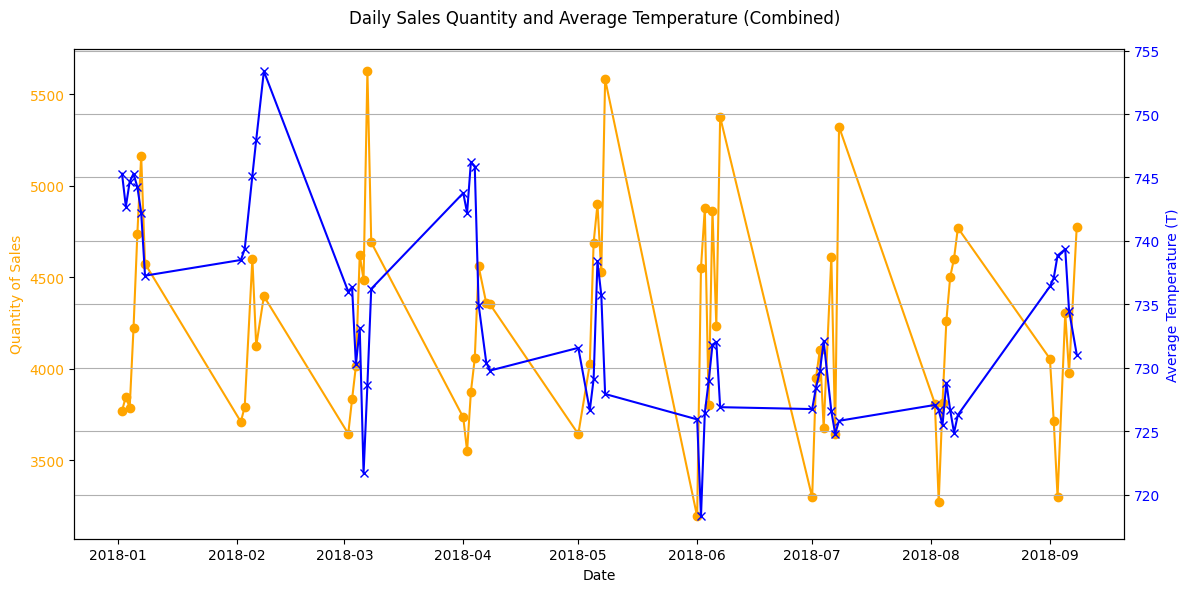

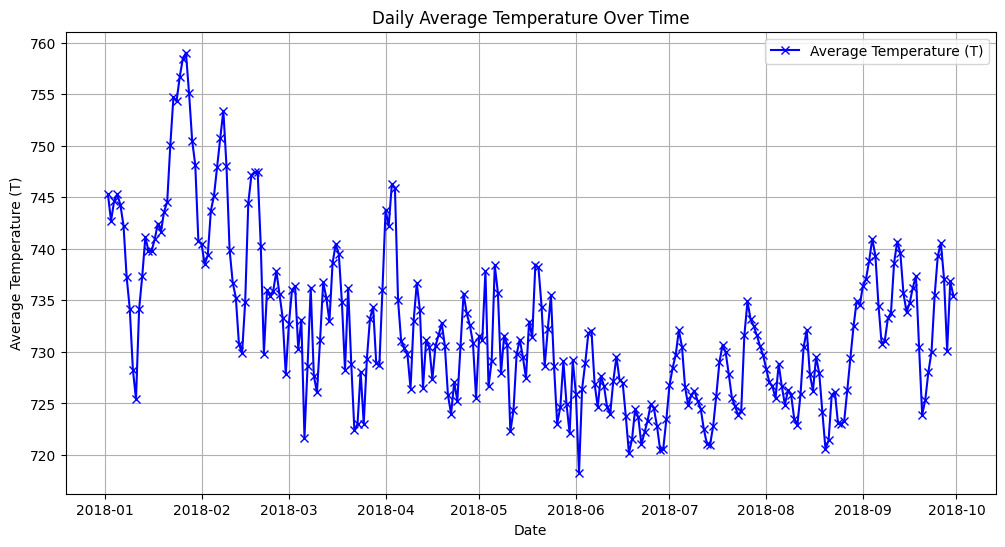

In [17]:
# Load the weather data without parsing dates initially and reset the index
weather_data = pd.read_csv(r'35188.02.01.2018.30.09.2018.1.0.0.ru.utf8.00000000.csv', sep=';')
weather_data.reset_index(inplace=True)

# Rename the index column to 'DateTime' for clarity
weather_data.rename(columns={'index': 'DateTime'}, inplace=True)

# Print the first few rows to verify
print("Weather Data with DateTime column:")
print(weather_data.head())

# Parse the DateTime column to convert it into datetime format
weather_data['DateTime'] = pd.to_datetime(weather_data['DateTime'], format='%d.%m.%Y %H:%M', errors='coerce')

# Drop rows with invalid datetime values
weather_data = weather_data.dropna(subset=['DateTime'])

# Extract only the date part for daily aggregation
weather_data['Date'] = weather_data['DateTime'].dt.date
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

# Calculate daily average temperature using the 'T' column
daily_avg_temp = weather_data.groupby('Date')['T'].mean().reset_index()
daily_avg_temp.rename(columns={'T': 'Average Temperature'}, inplace=True)

# Display the processed data to verify
print("Daily Average Temperature:")
print(daily_avg_temp.head())

# Ensure the 'Date' column in grouped_df is also in datetime format
grouped_df['Date'] = pd.to_datetime(grouped_df['Дата'])

# Merge the daily temperature data with the grouped sales data on the Date column
merged_data = pd.merge(grouped_df, daily_avg_temp, on='Date', how='inner')

# Verify the first few rows of merged_data after merging
print("Merged Data:")
print(merged_data.head())

# Plot sales quantity and average temperature on a dual-axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(merged_data['Date'], merged_data['Количество'], color='orange', marker='o', label='Quantity of Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Quantity of Sales', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Create a second y-axis for the Average Temperature
ax2 = ax1.twinx()
ax2.plot(merged_data['Date'], merged_data['Average Temperature'], color='blue', marker='x', label='Average Temperature (T)')
ax2.set_ylabel('Average Temperature (T)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and layout adjustments
fig.suptitle('Daily Sales Quantity and Average Temperature (Combined)')
fig.tight_layout()
plt.grid(True)
plt.show()

# Plot only the Average Temperature over time
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_temp['Date'], daily_avg_temp['Average Temperature'], color='blue', marker='x', label='Average Temperature (T)')
plt.xlabel('Date')
plt.ylabel('Average Temperature (T)')
plt.title('Daily Average Temperature Over Time')
plt.legend()
plt.grid(True)
plt.show()